In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

## Obtain the training and testing sets 

In [2]:
X_train = pd.read_table('./Data/train/X_train.txt',delim_whitespace=True,header=None)
Y_train = pd.read_table('./Data/train/y_train.txt',delim_whitespace=True,header=None)
X_test = pd.read_csv("./Data/test/X_test.txt",delim_whitespace=True,header=None)
Y_test = pd.read_csv('./Data/test/y_test.txt',delim_whitespace=True,header=None)

labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

## Number of features

In [3]:
features = pd.read_csv('./Data/features.txt',delim_whitespace=True,header=None)
len(features)

561

## Shape of all training and testing sets

In [4]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

## Fuction for ploting the Confustion Matrix

In [5]:
def plot_cm(cm, activity_labels,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    #normalizing the values to be between 0 and 1
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)  #interpolation set to nerest
    plt.title(title)                                    #title of the plot
    plt.colorbar()                                      #show colorbar
    activity_nr = np.arange(len(activity_labels))          
    plt.xticks(activity_nr, activity_labels, rotation=90)       #labels for the x axis
    plt.yticks(activity_nr, activity_labels)                    #labels for the y axis

    #writing the values for each box in the matrix
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if(format(cm[i, j], '.2f')=='0.00'):
                plt.text(j, i, '',horizontalalignment="center",color="black")
            else:
                if(i==j):
                    plt.text(j, i, format(cm[i, j], '.2f'),horizontalalignment="center",color="white")
                else:
                    plt.text(j, i, format(cm[i, j], '.2f'),horizontalalignment="center",color="black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Function to train any learning model

In [6]:
def learning_model(model, X_train, Y_train, X_test, Y_test, cm_normalize=True, cm_cmap=plt.cm.Blues):
    # creating a dictionary to store all the results
    model_dic = dict()
    # fiting the model
    model.fit(X_train, Y_train)
    # predicting the classification and storing it
    model_dic['predicted'] = Y_pred = model.predict(X_test)
    # calculating the accuracy of the model and store it
    model_dic['accuracy'] = accuracy = metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred)
    print('\nAccuracy: {:.2f}\n'.format(accuracy))

    # creating the cofusion matrix and ploting it
    model_dic['confusion_matrix'] = cm = metrics.confusion_matrix(Y_test, Y_pred)
    plot_cm(cm, activity_labels=labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    print('Confusion Matrix:\n')
    plt.show()

    # get classification report
    print('\nClassifiction Report:\n')
    classification_report = metrics.classification_report(Y_test, Y_pred,target_names= labels)
    # store report in results
    model_dic['classification_report'] = classification_report
    print(classification_report)

    # add the trained  model to the results
    model_dic['model'] = model
    return model_dic

## Function to print the grid search attributes

In [7]:
def print_attributes(model):
    # Estimator which gave highest scorein GridSearch.
    print('Best Estimator: {}'.format(model.best_estimator_))

    # Parameter setting that gave the best results on the hold out data.
    print('Best parameters of the estimator: {}'.format(model.best_params_))

    # The number of cross-validation splits 
    print('Total numbre of cross validation sets: {}'.format(model.n_splits_))

    # Mean cross-validated score of the best_estimator, from the Grid Search 
    print('Average Cross Validate scores of best estimator: {}'.format(model.best_score_))

## Logistic Regression

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   14.6s finished

Accuracy: 0.96

Confusion Matrix:



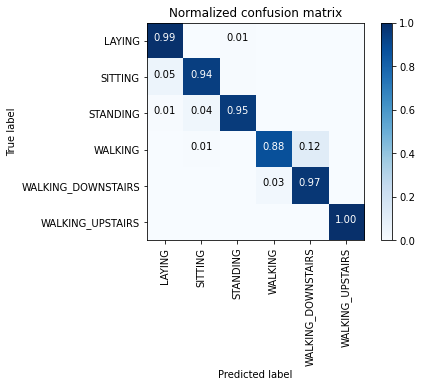


Classifiction Report:

                    precision    recall  f1-score   support

            LAYING       0.95      0.99      0.97       496
           SITTING       0.96      0.94      0.95       471
          STANDING       0.99      0.95      0.97       420
           WALKING       0.96      0.88      0.92       491
WALKING_DOWNSTAIRS       0.90      0.97      0.93       532
  WALKING_UPSTAIRS       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [8]:
parameters = {'C':[1,0.5,0.1,0.01,0.003,0.0003], 'penalty':['l2','l1']}
LR_grid = GridSearchCV(LogisticRegression(), param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
LR_grid_results =  learning_model(LR_grid, X_train, Y_train, X_test, Y_test)

## Logistic Regression grid search

In [9]:
print_attributes(LR_grid_results['model'])

Best Estimator: LogisticRegression(C=0.5)
Best parameters of the estimator: {'C': 0.5, 'penalty': 'l2'}
Total numbre of cross validation sets: 3
Average Cross Validate scores of best estimator: 0.936889288559161


## K-Nearest Neighbors

Fitting 3 folds for each of 11 candidates, totalling 33 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:  1.3min finished

Accuracy: 0.91

Confusion Matrix:



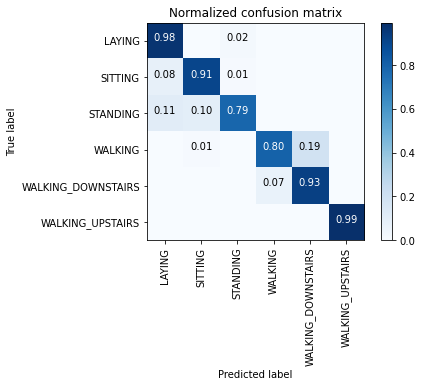


Classifiction Report:

                    precision    recall  f1-score   support

            LAYING       0.85      0.98      0.91       496
           SITTING       0.90      0.91      0.91       471
          STANDING       0.96      0.79      0.87       420
           WALKING       0.91      0.80      0.85       491
WALKING_DOWNSTAIRS       0.84      0.93      0.88       532
  WALKING_UPSTAIRS       1.00      0.99      1.00       537

          accuracy                           0.91      2947
         macro avg       0.91      0.90      0.90      2947
      weighted avg       0.91      0.91      0.90      2947



In [10]:
parameters = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}
KNN_grid = GridSearchCV(KNeighborsClassifier(), param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
KNN_grid_results =  learning_model(KNN_grid, X_train, Y_train, X_test, Y_test)

## K-Nearest Neighbors grid search

In [11]:
print_attributes(KNN_grid_results['model'])

Best Estimator: KNeighborsClassifier(n_neighbors=9)
Best parameters of the estimator: {'n_neighbors': 9}
Total numbre of cross validation sets: 3
Average Cross Validate scores of best estimator: 0.8928212002875405
